In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('College_Data',index_col=0)

In [4]:
data.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


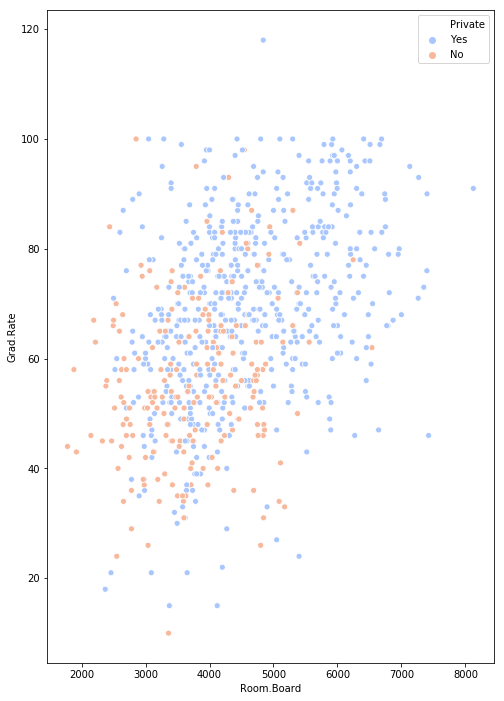

In [12]:
plt.figure(figsize=(8,12))
sns.scatterplot(x='Room.Board',y='Grad.Rate',data=data,hue='Private',palette='coolwarm')

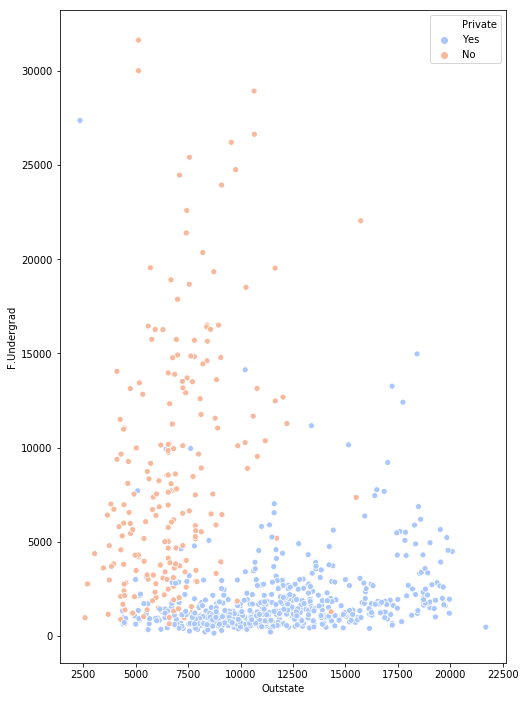

In [13]:
plt.figure(figsize=(8,12))
sns.scatterplot(x='Outstate',y='F.Undergrad',data=data,hue='Private',palette='coolwarm')

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


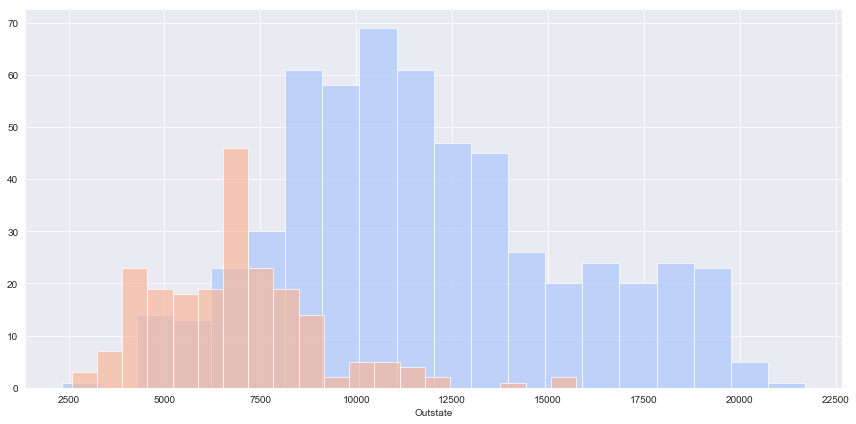

In [18]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


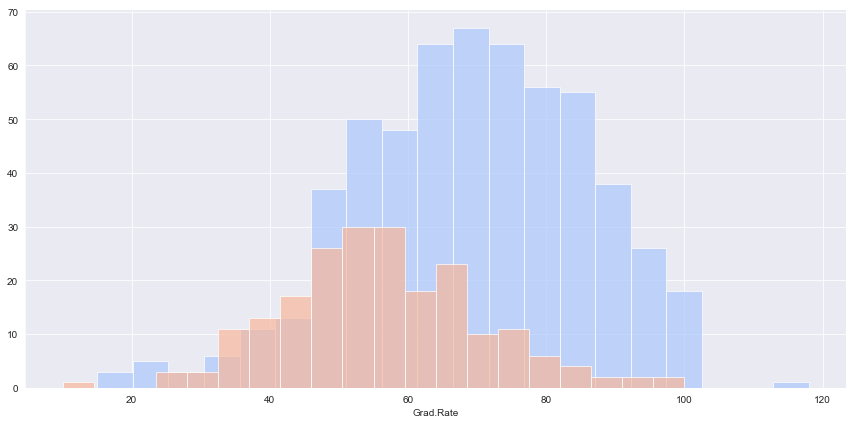

In [20]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [40]:
data[data['Grad.Rate']>100]

In [43]:
data['Grad.Rate']['Cazenovia College'] = 100

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
from sklearn.cluster import KMeans

In [48]:
km = KMeans(n_clusters=2)

In [52]:
df = data.drop('Private',axis=1)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
km.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

777

In [56]:
data['Apps'].iloc[0]

1660

In [66]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [67]:
data['Cluster'] = data['Private'].apply(converter)

In [68]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [70]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Cluster'],km.labels_))
print(classification_report(data['Cluster'],km.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

   micro avg       0.22      0.22      0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

